# M8 - TP3 : Couples de variable
Le but du TP est de à décrire les couples de variables.

|2.2|2.6|
|:-:|:-:|
|![](boxplot.png) |![](bagplot.png)|

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.spatial as ssp

## Ex. 1 : Échauffement

Montrer que :

\begin{equation}
\frac{1}{n}\sum^n_{i=1}(x_i - \bar{x})(y_i - \bar{y}) = \frac{1}{c}(n\sum^n_{i=1}(x_i y_i - \sum^n_{i=1}x_i\sum^n_{i=1}y_i))
\end{equation}

avec un $c$ que l'on précisera

\begin{align}
    \frac{1}{n} \sum^n_{i=1}(x_i - \bar{x}) (y_i - \bar{y}) &= ??? \\
    &= ??? \\
    &= ??? \\
    &= \frac{1}{c} (n\sum^n_{i=1} (x_i y_i - \sum^n_{i=1} x_i \sum^n_{i=1} y_i))
\end{align}

# Sol(c) = x^2

# Ex. 2 : Continues vs continues

1. Récupérez le fichier data3.mat sur moodle et construisez un tableau X de n lignes et deux colonnes (deux variables). 

In [3]:
mat = sio.loadmat("data3.mat")
X = mat["data3"].T
n = len(X)
X.shape

(37, 2)

2. Représentez ces données comme un nuage de point et dessinez les boite à moustaches associées à chacune des variables (affichées dans la figure 1 à gauche).

Text(0.5,1,'Boite pour Y')

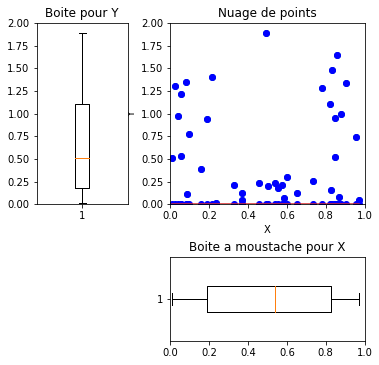

In [5]:
plt.figure(figsize=(8,8))  # Ajustement graphique

plt.subplot(2,2,2)
plt.stem(X[:,0],X[:,1],'ob')
plt.axis([0,1,0,2])
plt.title('Nuage de points')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(4,2,6)
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Ajustement graphique
plt.boxplot(X[:,0],0,'+',0)
plt.axis([0,1,0.75,1.25])
plt.title('Boite a moustache pour X')


plt.subplot(2,4,2)
plt.boxplot(X[:,1],0,'+',1)
a = plt.axis()
plt.axis([a[0], a[1], 0, 2])
plt.title('Boite pour Y')

3. . Calculez la covariance entre les variables de trois manières différentes (dont une utilisera la fonction cov de Numpy). Vérifiez que vous obtenez bien le même résultat. Ces deux variables sont elles liées ou sont elles indépendantes ?

In [18]:
c = np.mean(X,0) #fait la moyenne sur les collones 
c

array([0.49670811, 0.64721351])

In [21]:
Mc


array([[ 0.10200586, -0.00178846],
       [-0.00178846,  0.29635222]])

In [30]:
Mc.shape

(2, 2)

In [20]:
Xc = X - np.ones((n, 1))*c
Mc = (Xc.T @ Xc) / n
cv = (Xc[:, 0].T @ Xc[:, 1]) / n
cv

-0.0017884644338933523

In [22]:
c = np.mean(X, axis=0)
a = np.sum(X[:,0])
b = np.sum(X[:,1])
Cv = ((n*X[:,0].T@ X[:,1])-(a*b))/(n*n)
Cv

-0.0017884644338934715

In [23]:
(np.cov(X.T)*(n-1))/n

array([[ 0.10200586, -0.00178846],
       [-0.00178846,  0.29635222]])

4. Calculez la corrélation entre les variables de trois manières (dont une utilisera la fonction corrcoef de Numpy). Vérifiez que vous obtenez bien le même résultat.

In [29]:
vx = (Xc[:, 0].T @ Xc[:, 0]) / n
vy = (Xc[:, 1].T @ Xc[:, 1]) / n
c = Cv / (np.sqrt(vx)*np.sqrt(vy))
c

-0.010286405751159354

In [37]:
diag = np.diag(Mc)
c = Cv / (np.sqrt(diag[0])*np.sqrt(diag[1]))
c

-0.010286405751159355

In [26]:
np.corrcoef(X.T)

array([[ 1.        , -0.01028641],
       [-0.01028641,  1.        ]])

5. Calculez la médiane de Tukey de ce nuage de points. Comparez avec le résultat de la fonction median de Numpy

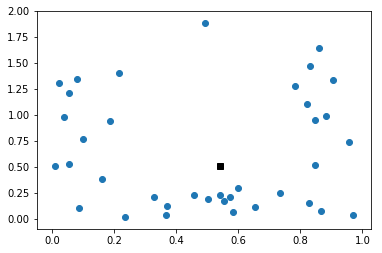

In [23]:
plt.scatter(X[:, 0], X[:, 1])
m = np.median(X, axis=0)
plt.plot(m[0], m[1], "sk")

Nombre de points : n = 37

6. Dessinez le sac médian

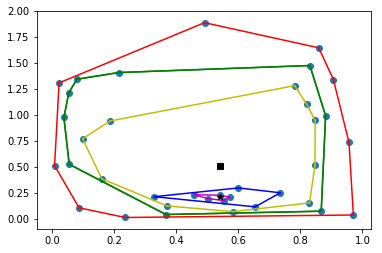

In [50]:
plt.scatter(X[:, 0], X[:, 1])

c1 = ssp.ConvexHull(X)
for point in c1.simplices:
    plt.plot(X[point, 0], X[point, 1], 'r-')

Xcopy = np.copy(X)
Xcopy = np.delete(Xcopy, c1.simplices, axis=0)
c2 = ssp.ConvexHull(Xcopy)
for point in c2.simplices:
    plt.plot(Xcopy[point, 0], Xcopy[point, 1], 'g-')
    
c2 = ssp.ConvexHull(Xcopy)
for point in c2.simplices:
    plt.plot(Xcopy[point, 0], Xcopy[point, 1], 'g-')
    
Xcopy2 = np.copy(Xcopy)
Xcopy2 = np.delete(Xcopy2, c2.simplices, axis=0)



c3 = ssp.ConvexHull(Xcopy2)
for point in c3.simplices:
    plt.plot(Xcopy2[point, 0], Xcopy2[point, 1], 'y-')
    
Xcopy3 = np.copy(Xcopy2)
Xcopy3 = np.delete(Xcopy3, c3.simplices, axis=0)

c4 = ssp.ConvexHull(Xcopy3)
for point in c4.simplices:
    plt.plot(Xcopy3[point, 0], Xcopy3[point, 1], 'b-')
    
Xcopy4 = np.copy(Xcopy3)
Xcopy4 = np.delete(Xcopy4, c4.simplices, axis=0)


c5 = ssp.ConvexHull(Xcopy4)
for point in c5.simplices:
    plt.plot(Xcopy4[point, 0], Xcopy4[point, 1], 'm-')
    
M = np.median(Xcopy4, axis=0)
Mm = np.median(X, axis=0)
plt.plot(M[0], M[1], "*k")
plt.plot(Mm[0], Mm[1], 'sk')

## Ex. 3 : Sudoku

Nous avons le tableau de contingence incomplet suivant :

\begin{array}{|c||c|c|c||c|}
\hline
 X \setminus Y & y_1 = 1 & y_2 = 4 & y_3 = 8 & \text{Marginal de }X\ \mathbb{P}(X) \\
 \hline \hline
 x_1 &0.1 &  0.2 &  0.3  &   0.6 \\
 \hline
 x_2 & 0.2   & 0.15  & 0.05   & 0.4   \\
 \hline\hline
 \text{Marginal de } Y\ \mathbb{P}(Y) &0.3& 0.35   &  0.35  &1   \\
 \hline
\end{array}

De plus, nous disposons de l’information suivante :
\begin{equation}
     \mathbb{P}(Y = y_1 |X = x_2) = \frac{1}{2}
\end{equation}

\begin{equation}
     \mathbb{P}(Y = y_3 |X = x_1) = \frac{1}{2}
\end{equation}

\begin{equation}
     \mathbb{E}(Y|X = x_2) = 3
\end{equation}

1. Compléter le tableau de contingence

2. Les variables $X$ et $Y$ sont elles indépendantes ? 
    Si X et Y indépendante alors P(X et Y) = P(X)* P(Y) 
    Or ici, P(x2ety1) = 0.2 et P(x2)* P(y1)= 0.4 * 0.3 = 0.12

**Astuce**: Pour le calculer le plus rapidement, suivez l'ordre suivant :

\begin{array}{|c||c|c|c||c|}
\hline
 X \setminus Y & y_1 = 1 & y_2 = 4 & y_3 = 8 & \text{Marginal de }X\ \mathbb{P}(X) \\
 \hline \hline
 x_1 &0.1 & \textbf{5}  & \textbf{4}   &  \textbf{3}  \\
 \hline
 x_2 &  \textbf{1}  &  \textbf{6} &  \textbf{7}  &  \textbf{2}  \\
 \hline\hline
 \text{Marginal de } Y\ \mathbb{P}(Y) &0.3&  \textbf{8}  &  \textbf{9}  &1   \\
 \hline
\end{array}

De plus, les variables **6 et 7** s'obtiennent en résolvant un système de deux équations à deux inconnues

## Ex. 4 : Matrices de contingence

1. Récupérer le fichier DataExo1.mat sur Moodle. . Les détails sur ces données sont disponibles https://archive.ics.uci.edu/ml/datasets/Student+Performance. Ces données décrivent les résultats des élèves dans l’enseignement secondaire de deux écoles portugaises.

In [8]:
mat = sio.loadmat("DataExo1.mat")

2. On commence par s’intéresser aux deux premières variables qui codent pour l’école $x$ et le genre $g$ de la personne interviewée.

In [17]:
x = mat["DataExo1"][:, 0]
g = mat["DataExo1"][:, 1]
n=len(x)


3. Construisez le tableau de contingence $O$ entre les variables $x$ et $g$

In [10]:
O = np.zeros((2,2))
O[0,0] = np.sum(np.logical_and((x == 0), (g == 0)))
O[1,0] = np.sum(np.logical_and((x == 1), (g == 0)))
O[0,1] = np.sum(np.logical_and((x == 0), (g == 1)))
O[1,1] = np.sum(np.logical_and((x == 1), (g == 1)))
O

array([[166., 183.],
       [ 21.,  25.]])

4. Construisez le tableau théorique associé en supposant l’indépendance des deux variables.

In [27]:
M1 = np.sum(O, axis=0)
Mc = np.sum(O, axis=1)
T = np.outer(M1, Mc).T /(n)
print(T)
print(O)
O-T

[[165.22278481 183.77721519]
 [ 21.77721519  24.22278481]]
[[166. 183.]
 [ 21.  25.]]


array([[ 0.77721519, -0.77721519],
       [-0.77721519,  0.77721519]])

5. Calculez la distance du chi2 entre les variables x et g. Ces deux variables sont elles liées ou sont elles indépendantes ?

In [29]:
D2 = np.sum((O-T)*(O-T)/T)
D2
#Les variables sont indépendates, en effet la distance D2 est très proche de 0. Il n'y a donc pas  de corrélation
#entre le genre de l'enfant et son école

0.059619131674428574

6. On s’intéresse maintenant à la septième variable $Me$ qui code le niveau d’éducation des mère de la manière suivante :

    * 0 - none,
    * 1 - primary education (4th grade),
    * 2 - 5th to 9th grade,
    * 3 - secondary education
    * 4 - higher education

Récupérez cette variable et calculez les effectifs de chacune des modalités. Qu’en concluez vous ?

In [13]:
Me = mat["DataExo1"][:, 7]
m = np.unique(np.sort(Me), return_counts=True)
n = len(Me)
m

#On peux en conclure que, la modalité la plus reprenseté est les mères qui ont arreté l'école entre le 5th et le 9th.

(array([0, 1, 2, 3, 4], dtype=uint8), array([  2,  82, 115, 100,  96]))

7. Construisez le tableau de contingence N entre les variables $x$ et $Me$

In [14]:
N = np.zeros((2,5))
N[0,0] = np.sum(np.logical_and((x==0), (Me==0)))
N[0,1] = np.sum(np.logical_and((x==0), (Me==1)))
N[0,2] = np.sum(np.logical_and((x==0), (Me==2)))
N[0,3] = np.sum(np.logical_and((x==0), (Me==3)))
N[0,4] = np.sum(np.logical_and((x==0), (Me==4)))
N[1,0] = np.sum(np.logical_and((x==1), (Me==0)))
N[1,1] = np.sum(np.logical_and((x==1), (Me==1)))
N[1,2] = np.sum(np.logical_and((x==1), (Me==2)))
N[1,3] = np.sum(np.logical_and((x==1), (Me==3)))
N[1,4] = np.sum(np.logical_and((x==1), (Me==4)))
N


array([[  2.,  67., 103.,  90.,  87.],
       [  0.,  15.,  12.,  10.,   9.]])

8. Construisez le tableau théorique associé en supposant l’indépendance des deux variables.

In [15]:
M1 = np.sum(N, axis=0)
Mc = np.sum(N, axis=1)
T = np.outer(M1, Mc).T /(n)
T

array([[  1.76708861,  72.45063291, 101.60759494,  88.35443038,
         84.82025316],
       [  0.23291139,   9.54936709,  13.39240506,  11.64556962,
         11.17974684]])

9. Calculez la distance du chi2 entre les variables $x$ et $Me$. Ces deux variables $x$ et $Me$ sont elles liées ou sont elles indépendantes ? Que peut on en déduire sur le choix de l’école ?

In [16]:
D2 = np.sum((N-T)*(N-T)/T)
D2

###4,7 proche de 0. On peux en déduire que les variables sont indépendantes. Il n'y a donc pas de lien entre 
###le choix de l'école et l'éducation des mères

4.692843315148199